   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                     0.00   
1                     0.0               2                    64.00   
2                     0.0               1                     0.00   
3                     0.0               2                     2.67   
4                     0.0              10                   627.50   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0         0.20     0.2000         0.0         0.0      1                 1   
1         0.00     0.1000         0.0         0.0      1

,precision,recall,f1-score,support
False,0.897,0.978,0.936,2079.000
True,0.740,0.354,0.479,362.000
accuracy,0.886,0.886,0.886,0.886
macro avg,0.818,0.666,0.707,2441.000
weighted avg,0.874,0.886,0.868,2441.000



Confusion Matrix:
 [[2034   45]
 [ 234  128]]

Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.98      0.94      2079
        True       0.74      0.35      0.48       362

    accuracy                           0.89      2441
   macro avg       0.82      0.67      0.71      2441
weighted avg       0.87      0.89      0.87      2441



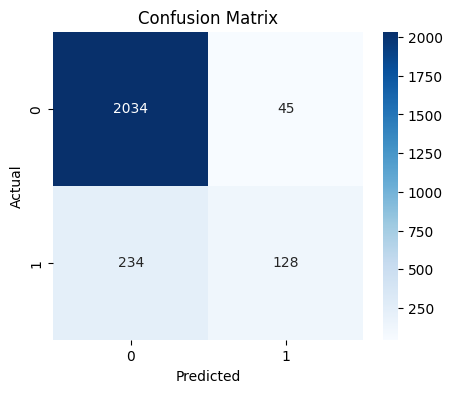

In [10]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
df = pd.read_csv(r"C:\Users\LIM TZE TA\VSCodeProjects\ML_Assignment\Classification\online_shoppers_intention_cleaned.csv")

# Display first few rows to verify
print(df.head())

# Define Features and Target
X = df.drop("Revenue", axis=1)
y = df["Revenue"]

# Train / Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = model.predict(X_test_scaled)

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose().round(3)

# Model Evaluation
print("\n=== Logistic Regression Performance ===")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
display(report_df)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualisation
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
